# Excerpt from the New York Times
http://www.nytimes.com/2014/09/20/nyregion/friskings-ebb-but-still-hang-over-brooklyn-lives.html?_r=0

In the housing projects of eastern Brooklyn, some young men no longer clasp hands when greeting each other, they say, fearful that their grasp might be mistaken for a drug deal and invite a search by the police. Friends heading to the bodega sometimes split up, worried that walking in a group will attract police attention.

They are subtle yet telling changes, lasting effects of years of police stops of young men, mostly in black and Latino neighborhoods. Often the stops were without legal justification, a federal court found last year.

Today, “stop-and-frisk” as New York City knew it is over, undone by a torrent of public outrage and political pressure, and by legal challenges that culminated in the ruling that the Police Department’s drastically increased use of the street stops of black and Hispanic men over the preceding decade was unconstitutional.

This is a quick example of converting data in to time stamps that pandas can understand and manipulate.

# Time Stamps

In [1]:
import pandas as pd

# the file must be placed in the same directory as where you are running iPython
# read in from csv file into a pandas data frame
df = pd.read_csv('data/SQF 2012.csv')
df.sex += 1 # make inline with the rest of the nominals in the datset

In [2]:
# let's take a look at the dataset (the csv I am using has a reduced number of columns) 
pd.options.display.max_columns = 0
df.head()

,year,datestop,timestop,city,sex,race,age,height,weight,frisked,searched,arstmade
0,2012,1012012,115,3.0,2.0,1.0,20,69,155,1,0,0
1,2012,1012012,310,1.0,2.0,3.0,18,67,175,0,0,0
2,2012,1012012,2000,2.0,2.0,1.0,19,69,180,0,0,0
3,2012,1022012,1245,2.0,2.0,1.0,37,65,210,0,0,0
4,2012,1042012,2220,2.0,2.0,3.0,21,67,170,0,0,0


In [3]:
df.describe() # display statistitcs from the dataset

,year,datestop,timestop,city,sex,race,age,height,weight,frisked,searched,arstmade
count,532911.0,5.329110e+05,532911.000000,532906.000000,525127.000000,519050.000000,532911.000000,532911.000000,532911.000000,532911.000000,532911.000000,532911.000000
mean,2012.0,5.563631e+06,1415.161796,2.517707,1.927518,2.011700,28.769539,68.600125,169.284830,0.557774,0.083031,0.060639
std,0.0,3.413338e+06,737.003276,1.146186,0.259284,1.245066,24.006996,3.184658,36.838004,0.496651,0.275929,0.238667
min,2012.0,1.012012e+06,0.000000,1.000000,1.000000,1.000000,0.000000,36.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.0,2.292012e+06,1002.000000,2.000000,2.000000,1.000000,19.000000,67.000000,150.000000,0.000000,0.000000,0.000000
50%,2012.0,5.052012e+06,1615.000000,2.000000,2.000000,1.000000,24.000000,69.000000,165.000000,1.000000,0.000000,0.000000
75%,2012.0,8.252012e+06,2030.000000,3.000000,2.000000,3.000000,34.000000,71.000000,180.000000,1.000000,0.000000,0.000000
max,2012.0,1.231201e+07,2359.000000,5.000000,2.000000,6.000000,999.000000,95.000000,999.000000,1.000000,1.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532911 entries, 0 to 532910
Data columns (total 12 columns):
year        532911 non-null int64
datestop    532911 non-null int64
timestop    532911 non-null int64
city        532906 non-null float64
sex         525127 non-null float64
race        519050 non-null float64
age         532911 non-null int64
height      532911 non-null int64
weight      532911 non-null int64
frisked     532911 non-null int64
searched    532911 non-null int64
arstmade    532911 non-null int64
dtypes: float64(3), int64(9)
memory usage: 48.8 MB


In [5]:
# convert ot a date time
date_as_series = pd.to_datetime(df.datestop.astype(str),format='%m%d%Y')
date_as_series

0        2012-10-01
1        2012-10-01
2        2012-10-01
3        2012-10-02
4        2012-10-04
            ...    
532906   2012-11-04
532907   2012-11-04
532908   2012-11-04
532909   2012-11-04
532910   2012-11-08
Name: datestop, Length: 532911, dtype: datetime64[ns]

In [6]:
# convert to a string that is representable with hours and minutes
timeofday_str = ["%2.2d:%2.2d"%(float(d)/100, float(d)%100) for d in df.timestop]

# convert that string using the datetime function
timeofday = pd.to_datetime(timeofday_str,format='%H:%M')
timeofday

DatetimeIndex(['1900-01-01 01:15:00', '1900-01-01 03:10:00',
               '1900-01-01 20:00:00', '1900-01-01 12:45:00',
               '1900-01-01 22:20:00', '1900-01-01 15:50:00',
               '1900-01-01 21:30:00', '1900-01-01 12:30:00',
               '1900-01-01 15:10:00', '1900-01-01 16:30:00',
               ...
               '1900-01-01 23:10:00', '1900-01-01 20:20:00',
               '1900-01-01 21:45:00', '1900-01-01 22:50:00',
               '1900-01-01 23:30:00', '1900-01-01 19:30:00',
               '1900-01-01 19:30:00', '1900-01-01 23:05:00',
               '1900-01-01 23:05:00', '1900-01-01 21:13:00'],
              dtype='datetime64[ns]', length=532911, freq=None)

In [7]:
timeofday_str = ["%s %2.2d:%2.2d"%(dat,float(hr)/100, float(hr)%100) for hr,dat in zip(df.timestop,df.datestop.astype(str))]
alldates = pd.to_datetime(timeofday_str,format='%m%d%Y %H:%M')
alldates

DatetimeIndex(['2012-10-01 01:15:00', '2012-10-01 03:10:00',
               '2012-10-01 20:00:00', '2012-10-02 12:45:00',
               '2012-10-04 22:20:00', '2012-10-05 15:50:00',
               '2012-10-05 21:30:00', '2012-10-06 12:30:00',
               '2012-10-06 15:10:00', '2012-10-06 16:30:00',
               ...
               '2012-12-28 23:10:00', '2012-12-29 20:20:00',
               '2012-10-06 21:45:00', '2012-10-08 22:50:00',
               '2012-10-18 23:30:00', '2012-11-04 19:30:00',
               '2012-11-04 19:30:00', '2012-11-04 23:05:00',
               '2012-11-04 23:05:00', '2012-11-08 21:13:00'],
              dtype='datetime64[ns]', length=532911, freq=None)

Some of the code in this notebook below is manipulated from the examples of how to use the DateTimeIndex in pandas, except manipulated for use with the current data.
- http://pandas.pydata.org/pandas-docs/stable/timeseries.html

In [8]:
# now lets replace the index of the pandas dataframe with the time stamp
df.index = alldates

In [9]:
# with the timestamp as an index, you can do all sorts of nifty, accelrated operations
df['2012-6']

,year,datestop,timestop,city,sex,race,age,height,weight,frisked,searched,arstmade
2012-06-02 15:00:00,2012,6022012,1500,1.0,2.0,1.0,56,69,165,1,1,1
2012-06-02 19:10:00,2012,6022012,1910,1.0,2.0,6.0,24,66,150,0,0,0
2012-06-01 19:38:00,2012,6012012,1938,1.0,2.0,1.0,22,70,146,0,0,0
2012-06-02 17:35:00,2012,6022012,1735,1.0,1.0,1.0,21,65,150,0,0,0
2012-06-02 17:35:00,2012,6022012,1735,1.0,1.0,1.0,22,64,120,0,0,0
2012-06-02 17:35:00,2012,6022012,1735,1.0,1.0,2.0,22,62,120,0,0,0
2012-06-02 05:49:00,2012,6022012,549,1.0,2.0,4.0,24,71,200,0,0,0
2012-06-02 05:49:00,2012,6022012,549,1.0,2.0,3.0,23,71,200,0,0,0
2012-06-02 05:49:00,2012,6022012,549,1.0,2.0,3.0,24,71,140,0,0,0
2012-06-02 05:49:00,2012,6022012,549,1.0,2.0,3.0,25,69,140,0,0,0


In [10]:
df['2012-4-1':'2012-4-2']

,year,datestop,timestop,city,sex,race,age,height,weight,frisked,searched,arstmade
2012-04-01 15:48:00,2012,4012012,1548,1.0,2.0,3.0,20,64,130,0,0,0
2012-04-01 19:02:00,2012,4012012,1902,1.0,2.0,5.0,22,72,240,1,0,0
2012-04-01 19:02:00,2012,4012012,1902,1.0,2.0,5.0,22,72,200,1,0,1
2012-04-01 00:45:00,2012,4012012,45,1.0,2.0,3.0,31,64,150,0,0,0
2012-04-01 00:45:00,2012,4012012,45,1.0,2.0,3.0,37,67,170,0,0,0
2012-04-01 15:55:00,2012,4012012,1555,1.0,2.0,4.0,32,70,205,0,0,0
2012-04-01 15:55:00,2012,4012012,1555,1.0,1.0,4.0,35,68,130,0,0,0
2012-04-02 08:35:00,2012,4022012,835,1.0,2.0,1.0,47,73,165,0,0,0
2012-04-02 12:20:00,2012,4022012,1220,1.0,2.0,1.0,24,73,160,0,0,0
2012-04-02 11:30:00,2012,4022012,1130,1.0,2.0,1.0,33,71,180,0,0,0


In [11]:
df.frisked['2012-4-1':'2012-4-2'].sum() / float(df.frisked['2012-4-1':'2012-4-2'].count()) *100

49.11717495987159

In [12]:
# Property	Description
# year	The year of the datetime
# month	The month of the datetime
# day	The days of the datetime
# hour	The hour of the datetime
# minute	The minutes of the datetime
# second	The seconds of the datetime
# microsecond	The microseconds of the datetime
# nanosecond	The nanoseconds of the datetime
# date	Returns datetime.date
# time	Returns datetime.time
# dayofyear	The ordinal day of year
# weekofyear	The week ordinal of the year
# week	The week ordinal of the year
# dayofweek	The day of the week with Monday=0, Sunday=6
# weekday	The day of the week with Monday=0, Sunday=6
# quarter	Quarter of the date: Jan=Mar = 1, Apr-Jun = 2, etc.
# is_month_start	Logical indicating if first day of month (defined by frequency)
# is_month_end	Logical indicating if last day of month (defined by frequency)
# is_quarter_start	Logical indicating if first day of quarter (defined by frequency)
# is_quarter_end	Logical indicating if last day of quarter (defined by frequency)
# is_year_start	Logical indicating if first day of year (defined by frequency)
# is_year_end	Logical indicating if last day of year (defined by frequency)

df[df.index.dayofweek==2]

,year,datestop,timestop,city,sex,race,age,height,weight,frisked,searched,arstmade
2012-11-07 00:30:00,2012,1172012,30,1.0,2.0,3.0,18,72,170,0,0,0
2012-11-07 18:50:00,2012,1172012,1850,3.0,2.0,3.0,24,66,180,0,0,0
2012-11-07 20:50:00,2012,1172012,2050,3.0,2.0,1.0,22,72,200,1,0,0
2012-11-07 21:00:00,2012,1172012,2100,3.0,2.0,1.0,22,67,160,1,0,0
2012-11-07 21:45:00,2012,1172012,2145,1.0,2.0,1.0,19,69,160,1,0,0
2012-11-07 22:15:00,2012,1172012,2215,3.0,2.0,1.0,22,70,170,1,0,0
2012-12-05 13:28:00,2012,1252012,1328,1.0,2.0,1.0,17,66,160,0,0,0
2012-12-05 16:50:00,2012,1252012,1650,3.0,2.0,1.0,17,72,180,0,0,0
2012-12-05 19:35:00,2012,1252012,1935,3.0,2.0,1.0,26,68,160,1,0,0
2012-12-05 20:55:00,2012,1252012,2055,2.0,1.0,1.0,14,64,120,0,0,0


In [13]:
# another fun example
df[(df.index.hour<8) & (df.frisked==1)].count() / df[(df.index.hour<8)].count()

year        0.599458
datestop    0.599458
timestop    0.599458
city        0.599458
sex         0.600127
race        0.600919
age         0.599458
height      0.599458
weight      0.599458
frisked     0.599458
searched    0.599458
arstmade    0.599458
dtype: float64

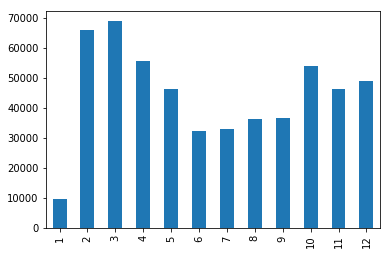

In [14]:
%matplotlib inline
df['month'] = df.index.month
mcounts = df['month'].value_counts()
mcounts.sort_index().plot(kind='bar')

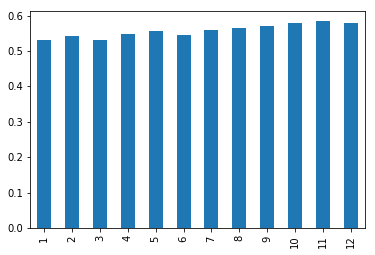

In [15]:
df_frisked = df[df.frisked>0]
mprct = df_frisked['month'].value_counts() / df['month'].value_counts()
mprct.sort_index().plot(kind='bar')